In [1]:
# import all necessary libraries
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd
import csv
import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Table4.csv') # read in the csv file which contains the data

In [3]:
df # data frame of inputs

,Team,Game,Game outcome,Number of top players (In Top 100),Top scorer (weighted goals) contribution,Top player ratings (total),Total assists (In Top 100),Team Versatility score,FIFA 20 rating (sum),Num top players metric,...,Total assists metric,Team Versatility metric,FIFA 20 rating metric,Ignore,Number of top players (In Top 100).1,Top scorer (weighted goals) contribution.1,Top player ratings (total).1,Total assists (In Top 100).1,Team Versatility score.1,FIFA 20 rating (sum).1
0,Everton,8,0,5,31,35.68,15,52,235,0,...,0,0,1,10.0,0.5,0.392405,0.493499,0.263158,0.52,0.917969
1,Leicester,9,1,7,33,49.62,21,58,233,1,...,1,1,0,79.0,0.7,0.417722,0.686307,0.368421,0.58,0.910156
2,Arsenal,5,1,6,48,42.20,22,64,248,1,...,1,0,1,72.3,0.6,0.607595,0.583679,0.385965,0.64,0.968750
3,Fulham,19,0,1,11,7.03,3,70,220,0,...,0,1,0,57.0,0.1,0.139241,0.097234,0.052632,0.70,0.859375
4,Cardiff,18,0,3,9,20.99,5,85,216,0,...,0,1,0,100.0,0.3,0.113924,0.290318,0.087719,0.85,0.843750
5,Tottenham,4,1,7,54,56.42,28,76,251,1,...,1,0,1,256.0,0.7,0.683544,0.780360,0.491228,0.76,0.980469
6,Chelsea,3,0,9,43,56.92,34,82,242,1,...,1,1,1,256.0,0.9,0.544304,0.787275,0.596491,0.82,0.945312
7,Southampton,16,1,3,6,21.02,5,46,228,0,...,0,0,0,256.0,0.3,0.075949,0.290733,0.087719,0.46,0.890625
8,Bournemouth,14,0,4,36,34.96,18,79,232,1,...,1,0,0,256.0,0.4,0.455696,0.483541,0.315789,0.79,0.906250
9,Watford,11,1,3,13,21.24,14,94,233,0,...,0,1,1,256.0,0.3,0.164557,0.293776,0.245614,0.94,0.910156


In [4]:
# Table view of continuous data features
X = df.iloc[0:,16:]
Y = df.iloc[0:,2]

X



,Number of top players (In Top 100).1,Top scorer (weighted goals) contribution.1,Top player ratings (total).1,Total assists (In Top 100).1,Team Versatility score.1,FIFA 20 rating (sum).1
0,0.5,0.392405,0.493499,0.263158,0.52,0.917969
1,0.7,0.417722,0.686307,0.368421,0.58,0.910156
2,0.6,0.607595,0.583679,0.385965,0.64,0.968750
3,0.1,0.139241,0.097234,0.052632,0.70,0.859375
4,0.3,0.113924,0.290318,0.087719,0.85,0.843750
5,0.7,0.683544,0.780360,0.491228,0.76,0.980469
6,0.9,0.544304,0.787275,0.596491,0.82,0.945312
7,0.3,0.075949,0.290733,0.087719,0.46,0.890625
8,0.4,0.455696,0.483541,0.315789,0.79,0.906250
9,0.3,0.164557,0.293776,0.245614,0.94,0.910156


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, random_state = 90)

In [6]:
# Define the model
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=6))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# compile the keras model
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X_train, Y_train, batch_size=10, epochs=150, validation_data = (X_test, Y_test))

Train on 250 samples, validate on 108 samples
Epoch 1/150
250/250 [==============================] - 0s 1ms/step - loss: 0.7375 - acc: 0.4880 - val_loss: 0.7041 - val_acc: 0.5278
Epoch 2/150
250/250 [==============================] - 0s 118us/step - loss: 0.7114 - acc: 0.4880 - val_loss: 0.6893 - val_acc: 0.5278
Epoch 3/150
250/250 [==============================] - 0s 131us/step - loss: 0.6933 - acc: 0.5160 - val_loss: 0.6747 - val_acc: 0.6204
Epoch 4/150
250/250 [==============================] - 0s 120us/step - loss: 0.6781 - acc: 0.5760 - val_loss: 0.6688 - val_acc: 0.6389
Epoch 5/150
250/250 [==============================] - 0s 119us/step - loss: 0.6707 - acc: 0.6040 - val_loss: 0.6668 - val_acc: 0.6204
Epoch 6/150
250/250 [==============================] - 0s 120us/step - loss: 0.6667 - acc: 0.6200 - val_loss: 0.6649 - val_acc: 0.5648
Epoch 7/150
250/250 [==============================] - 0s 127us/step - loss: 0.6623 - acc: 0.6120 - val_loss: 0.6639 - val_acc: 0.5741
Epoch 8/150

Epoch 61/150
250/250 [==============================] - 0s 131us/step - loss: 0.6360 - acc: 0.6120 - val_loss: 0.6505 - val_acc: 0.5741
Epoch 62/150
250/250 [==============================] - 0s 111us/step - loss: 0.6377 - acc: 0.6160 - val_loss: 0.6530 - val_acc: 0.5741
Epoch 63/150
250/250 [==============================] - 0s 113us/step - loss: 0.6373 - acc: 0.6160 - val_loss: 0.6501 - val_acc: 0.6204
Epoch 64/150
250/250 [==============================] - 0s 130us/step - loss: 0.6361 - acc: 0.6160 - val_loss: 0.6509 - val_acc: 0.5741
Epoch 65/150
250/250 [==============================] - 0s 117us/step - loss: 0.6386 - acc: 0.6040 - val_loss: 0.6543 - val_acc: 0.5648
Epoch 66/150
250/250 [==============================] - 0s 121us/step - loss: 0.6353 - acc: 0.6200 - val_loss: 0.6518 - val_acc: 0.5741
Epoch 67/150
250/250 [==============================] - 0s 124us/step - loss: 0.6348 - acc: 0.6200 - val_loss: 0.6506 - val_acc: 0.6204
Epoch 68/150
250/250 [==========================

250/250 [==============================] - 0s 128us/step - loss: 0.6341 - acc: 0.6120 - val_loss: 0.6579 - val_acc: 0.5741
Epoch 122/150
250/250 [==============================] - 0s 122us/step - loss: 0.6352 - acc: 0.6120 - val_loss: 0.6593 - val_acc: 0.5741
Epoch 123/150
250/250 [==============================] - 0s 117us/step - loss: 0.6362 - acc: 0.6040 - val_loss: 0.6587 - val_acc: 0.5741
Epoch 124/150
250/250 [==============================] - 0s 114us/step - loss: 0.6347 - acc: 0.6080 - val_loss: 0.6575 - val_acc: 0.5741
Epoch 125/150
250/250 [==============================] - 0s 117us/step - loss: 0.6345 - acc: 0.6120 - val_loss: 0.6590 - val_acc: 0.5741
Epoch 126/150
250/250 [==============================] - 0s 112us/step - loss: 0.6341 - acc: 0.6120 - val_loss: 0.6587 - val_acc: 0.5741
Epoch 127/150
250/250 [==============================] - 0s 119us/step - loss: 0.6347 - acc: 0.6120 - val_loss: 0.6588 - val_acc: 0.5741
Epoch 128/150
250/250 [==============================] 

In [9]:
#Results after running the input data that has
# not been binary encoded through the deep neural network.
# roundn encodes each value in the array as 0 or 1
# 
def roundn(x):
    for i in range(0,len(x)):
        
        if (i<0.5):
            i = 0
        else:
            i = 1
    return x
y_predict = roundn(model.predict(X_test))
y_predict = (y_predict)
len(y_predict)

scores = model.evaluate(X_test, Y_test, verbose=0)
print(np.mean(scores))


0.6168147071644112


In [10]:
# confusion matrix on the input data features
# that have not yet been encoded as binary values
from sklearn.metrics import confusion_matrix


y_predict = np.where(y_predict > 0.5, 1, 0)
cm = confusion_matrix(Y_test, y_predict)
cm





array([[33, 24],
       [22, 29]])

In [11]:
# Features of binary encoded data features
X_1 = df.iloc[0:,9:15]
Y_1 = df.iloc[0:,2]

X_1

,Num top players metric,Top scorer metric,Top player ratings metric,Total assists metric,Team Versatility metric,FIFA 20 rating metric
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,0,1
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,1,1,1,0,1
6,1,1,1,1,1,1
7,0,0,0,0,0,0
8,1,1,1,1,0,0
9,0,0,0,0,1,1


In [12]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1,Y_1, train_size=0.7, random_state = 90)

In [13]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(6, activation='relu', input_dim=6))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [14]:
# compile the keras model
model_1.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model_1.fit(X_train_1, Y_train_1, batch_size=10, epochs=150, validation_data = (X_test_1, Y_test_1))

Train on 250 samples, validate on 108 samples
Epoch 1/150
250/250 [==============================] - 0s 1ms/step - loss: 0.6619 - acc: 0.5880 - val_loss: 0.6828 - val_acc: 0.5833
Epoch 2/150
250/250 [==============================] - 0s 119us/step - loss: 0.6516 - acc: 0.5920 - val_loss: 0.6823 - val_acc: 0.6111
Epoch 3/150
250/250 [==============================] - 0s 128us/step - loss: 0.6465 - acc: 0.6960 - val_loss: 0.6816 - val_acc: 0.6111
Epoch 4/150
250/250 [==============================] - 0s 121us/step - loss: 0.6432 - acc: 0.6960 - val_loss: 0.6825 - val_acc: 0.6019
Epoch 5/150
250/250 [==============================] - 0s 129us/step - loss: 0.6416 - acc: 0.6880 - val_loss: 0.6823 - val_acc: 0.6019
Epoch 6/150
250/250 [==============================] - 0s 127us/step - loss: 0.6392 - acc: 0.6880 - val_loss: 0.6814 - val_acc: 0.6019
Epoch 7/150
250/250 [==============================] - 0s 131us/step - loss: 0.6371 - acc: 0.6880 - val_loss: 0.6803 - val_acc: 0.6019
Epoch 8/150

Epoch 61/150
250/250 [==============================] - 0s 129us/step - loss: 0.5957 - acc: 0.7040 - val_loss: 0.6682 - val_acc: 0.6574
Epoch 62/150
250/250 [==============================] - 0s 119us/step - loss: 0.5969 - acc: 0.7040 - val_loss: 0.6688 - val_acc: 0.6574
Epoch 63/150
250/250 [==============================] - 0s 123us/step - loss: 0.5954 - acc: 0.7040 - val_loss: 0.6649 - val_acc: 0.6481
Epoch 64/150
250/250 [==============================] - 0s 115us/step - loss: 0.5953 - acc: 0.7040 - val_loss: 0.6666 - val_acc: 0.6574
Epoch 65/150
250/250 [==============================] - 0s 121us/step - loss: 0.5955 - acc: 0.7040 - val_loss: 0.6652 - val_acc: 0.6574
Epoch 66/150
250/250 [==============================] - 0s 127us/step - loss: 0.5949 - acc: 0.7040 - val_loss: 0.6678 - val_acc: 0.6574
Epoch 67/150
250/250 [==============================] - 0s 141us/step - loss: 0.5952 - acc: 0.7040 - val_loss: 0.6664 - val_acc: 0.6574
Epoch 68/150
250/250 [==========================

250/250 [==============================] - 0s 122us/step - loss: 0.5900 - acc: 0.7040 - val_loss: 0.6718 - val_acc: 0.6574
Epoch 122/150
250/250 [==============================] - 0s 122us/step - loss: 0.5906 - acc: 0.7040 - val_loss: 0.6736 - val_acc: 0.6574
Epoch 123/150
250/250 [==============================] - 0s 114us/step - loss: 0.5922 - acc: 0.7040 - val_loss: 0.6698 - val_acc: 0.6574
Epoch 124/150
250/250 [==============================] - 0s 119us/step - loss: 0.5899 - acc: 0.7040 - val_loss: 0.6735 - val_acc: 0.6574
Epoch 125/150
250/250 [==============================] - 0s 150us/step - loss: 0.5896 - acc: 0.7040 - val_loss: 0.6714 - val_acc: 0.6574
Epoch 126/150
250/250 [==============================] - 0s 113us/step - loss: 0.5902 - acc: 0.7040 - val_loss: 0.6721 - val_acc: 0.6574
Epoch 127/150
250/250 [==============================] - 0s 112us/step - loss: 0.5901 - acc: 0.7040 - val_loss: 0.6729 - val_acc: 0.6574
Epoch 128/150
250/250 [==============================] 

In [16]:
# Here we find out the accuracy of the 
# predictions made on the binary encoded data features
# that have been run through  a deep learnng model
y_predict_1 = model_1.predict(X_test_1)
y_predict_1 = np.where(y_predict_1>0.5,1,0)
y_predict_1 = (y_predict_1)
y_predict_1
scores_1 = model_1.evaluate(X_test_1, Y_test_1, verbose=0)
print(np.mean(scores_1))

0.6662720485969826


In [17]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test_1, y_predict_1) # confusion matrix on binary
# encoded input data features
cm1
true_pos = cm1[0][0]
false_neg = cm1[0][1]
false_pos = cm1[1][0]
true_neg = cm1[1][1]
print("True Positive {}".format(true_pos))
print("False Negative {}".format(false_neg))
print("False Positive {}".format(false_pos))
print("True Negative {}".format(true_neg))
accuracy = (true_pos+true_neg)/(true_pos+false_neg+false_pos+true_neg)
print ("Accuracy of classification in deep learning: {}".format(accuracy))


True Positive 37
False Negative 20
False Positive 17
True Negative 34
Accuracy of classification in deep learning: 0.6574074074074074


In [18]:
cl = LogisticRegression()
cl.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
cl1 = LogisticRegression()
cl1.fit(X_train_1,Y_train_1)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = cl.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(cl.score(X, Y)))

Accuracy of logistic regression classifier on test set: 0.60


In [21]:
y_pred = cl1.predict(X_test_1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(cl.score(X_1, Y_1)))

Accuracy of logistic regression classifier on test set: 0.68


In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf1.fit(X_train_1, Y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [24]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
cl.score(X_test, Y_test)

0.5740740740740741

In [25]:
# Use the forest's predict method on the test data
predictions_1 = rf.predict(X_test_1)
cl1.score(X_test_1, Y_test_1)

0.6574074074074074

In [26]:
df.corr() # find correlation of each input features to each other

,Game,Game outcome,Number of top players (In Top 100),Top scorer (weighted goals) contribution,Top player ratings (total),Total assists (In Top 100),Team Versatility score,FIFA 20 rating (sum),Num top players metric,Top scorer metric,...,Total assists metric,Team Versatility metric,FIFA 20 rating metric,Ignore,Number of top players (In Top 100).1,Top scorer (weighted goals) contribution.1,Top player ratings (total).1,Total assists (In Top 100).1,Team Versatility score.1,FIFA 20 rating (sum).1
Game,1.000000,-0.304343,-0.896099,-0.893210,-0.902340,-0.879918,-0.230174,-0.943017,-0.552573,-0.557884,...,-0.562553,-0.149510,-0.599578,-0.019214,-0.896099,-0.893210,-0.902340,-0.879918,-0.230174,-0.943017
Game outcome,-0.304343,1.000000,0.290888,0.301381,0.289678,0.317318,0.099073,0.309703,0.308207,0.284934,...,0.380179,0.117318,0.329691,0.029013,0.290888,0.301381,0.289678,0.317318,0.099073,0.309703
Number of top players (In Top 100),-0.896099,0.290888,1.000000,0.877213,0.976607,0.828643,0.183901,0.833813,0.588016,0.524762,...,0.506234,0.128078,0.524253,0.019498,1.000000,0.877213,0.976607,0.828643,0.183901,0.833813
Top scorer (weighted goals) contribution,-0.893210,0.301381,0.877213,1.000000,0.929065,0.929441,0.296652,0.907740,0.536770,0.588383,...,0.559863,0.188330,0.548973,0.015621,0.877213,1.000000,0.929065,0.929441,0.296652,0.907740
Top player ratings (total),-0.902340,0.289678,0.976607,0.929065,1.000000,0.867816,0.219558,0.870430,0.588395,0.549689,...,0.527743,0.143037,0.541007,0.024858,0.976607,0.929065,1.000000,0.867816,0.219558,0.870430
Total assists (In Top 100),-0.879918,0.317318,0.828643,0.929441,0.867816,1.000000,0.447078,0.841303,0.495540,0.541456,...,0.585204,0.274785,0.507470,0.043153,0.828643,0.929441,0.867816,1.000000,0.447078,0.841303
Team Versatility score,-0.230174,0.099073,0.183901,0.296652,0.219558,0.447078,1.000000,0.196893,0.116905,0.161921,...,0.244767,0.597822,0.108788,0.048513,0.183901,0.296652,0.219558,0.447078,1.000000,0.196893
FIFA 20 rating (sum),-0.943017,0.309703,0.833813,0.907740,0.870430,0.841303,0.196893,1.000000,0.517676,0.546312,...,0.529031,0.127554,0.594815,0.038410,0.833813,0.907740,0.870430,0.841303,0.196893,1.000000
Num top players metric,-0.552573,0.308207,0.588016,0.536770,0.588395,0.495540,0.116905,0.517676,1.000000,0.710845,...,0.681112,0.106471,0.710101,0.018691,0.588016,0.536770,0.588395,0.495540,0.116905,0.517676
Top scorer metric,-0.557884,0.284934,0.524762,0.588383,0.549689,0.541456,0.161921,0.546312,0.710845,1.000000,...,0.771151,0.195543,0.731822,0.027637,0.524762,0.588383,0.549689,0.541456,0.161921,0.546312


In [27]:
# Perform Principal Component Analysis on the data.
# reduce dimensions to 2 principal components (2D)
# on the data features that are not binary-encoded
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.84981767, 0.09967697])

In [28]:
# Do the same as above to the binary encoded input features
from sklearn.decomposition import PCA, KernelPCA
pca1 = PCA(n_components=2)
X_train_1 = pca.fit_transform(X_train_1)
X_test_1 = pca.transform(X_test_1)
explained_variance_1 = pca.explained_variance_ratio_
explained_variance_1

array([0.65927612, 0.16237311])

In [29]:
# Fitting Logistic Regression to the Training set (i.e. the set without binary encoded inputs)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Fitting Logistic Regression to the Training set (i.e the binary-encoded inputs)
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train_1,Y_train_1)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [32]:
# Predicting the Test set results after performing binary encoding on the data set input features
y_pred1 = classifier.predict(X_test_1)
y_pred1

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_log_reg = confusion_matrix(Y_test,y_pred)
cm_log_reg

true_pos = cm_log_reg[0][0]
false_neg = cm_log_reg[0][1]
false_pos = cm_log_reg[1][0]
true_neg = cm_log_reg[1][1]
print("True Positive {}".format(true_pos))
print("False Negative {}".format(false_neg))
print("False Positive {}".format(false_pos))
print("True Negative {}".format(true_neg))
accuracy = (true_pos+true_neg)/(true_pos+false_neg+false_pos+true_neg)
print ("Accuracy of classification in logistic regression: {}".format(accuracy))

True Positive 37
False Negative 20
False Positive 31
True Negative 20
Accuracy of classification in logistic regression: 0.5277777777777778


In [34]:
# Making the Confusion Matrix for logistic regression
from sklearn.metrics import confusion_matrix
cm_log_reg_1 = confusion_matrix(Y_test_1,y_pred1)
cm_log_reg_1

true_pos = cm_log_reg_1[0][0]
false_neg = cm_log_reg_1[0][1]
false_pos = cm_log_reg_1[1][0]
true_neg = cm_log_reg_1[1][1]
print("True Positive {}".format(true_pos))
print("False Negative {}".format(false_neg))
print("False Positive {}".format(false_pos))
print("True Negative {}".format(true_neg))
accuracy = (true_pos+true_neg)/(true_pos+false_neg+false_pos+true_neg)
print ("Accuracy of classification in log_reg_1: {}".format(accuracy))


True Positive 36
False Negative 21
False Positive 17
True Negative 34
Accuracy of classification in log_reg_1: 0.6481481481481481


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


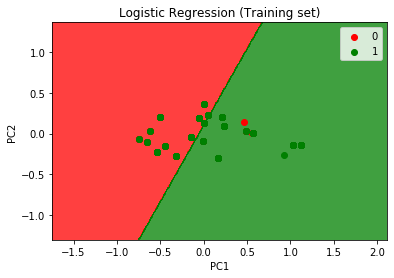

In [35]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                     X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


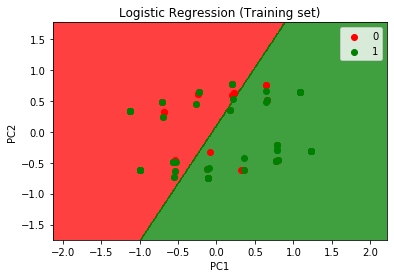

In [36]:
# Visualizing the Training set results of binary encoded inputs
from matplotlib.colors import ListedColormap
X_set_1, Y_set_1 = X_train_1, Y_train_1
X1_1, X2_1 = np.meshgrid(np.arange(start = X_set_1[:,0].min() - 1,
                               stop = X_set_1[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set_1[:, 1].min() - 1,
                              stop = X_set_1[:, 1].max() + 1, step = 0.01))
plt.contourf(X1_1, X2_1, classifier.predict(np.array([X1_1.ravel(),
                                                     X2_1.ravel()]).T).reshape(X1_1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1_1.min(), X1_1.max())
plt.ylim(X2_1.min(), X2_1.max())
for i, j in enumerate(np.unique(Y_set_1)):
    plt.scatter(X_set_1[Y_set_1 == j, 0], X_set_1[Y_set_1 == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [37]:
# Fit a support vector cclassifier to the training set
from sklearn.svm import SVC
cf = SVC(kernel='poly', random_state=0)
cf.fit(X_set, Y_set)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
# Fit a support vector cclassifier to the training set
from sklearn.svm import SVC
cf1 = SVC(kernel='poly', random_state=0)
cf1.fit(X_set_1, Y_set_1)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


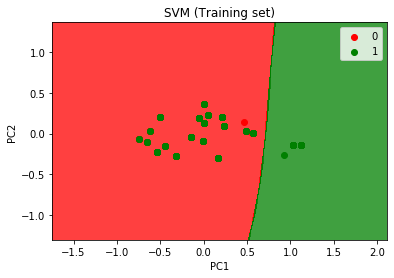

In [39]:
X_set1, Y_set1 = X_set, Y_set
X1a, X2a = np.meshgrid(np.arange(start = X_set1[:,0].min() - 1,
                               stop = X_set1[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set1[:, 1].min() - 1,
                              stop = X_set1[:, 1].max() + 1, step = 0.01))
plt.contourf(X1a, X2a, cf.predict(np.array([X1.ravel(),
                                                     X2a.ravel()]).T).reshape(X1a.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1a.min(), X1a.max())
plt.ylim(X2a.min(), X2a.max())
for i, j in enumerate(np.unique(Y_set1)):
    plt.scatter(X_set1[Y_set1 == j, 0], X_set1[Y_set1 == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


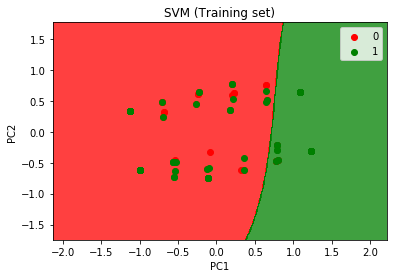

In [40]:
X_set_2, Y_set_2 = X_set_1, Y_set_1
X1a, X2a = np.meshgrid(np.arange(start = X_set_2[:,0].min() - 1,
                               stop = X_set_2[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set_2[:, 1].min() - 1,
                              stop = X_set_2[:, 1].max() + 1, step = 0.01))
plt.contourf(X1a, X2a, cf.predict(np.array([X1a.ravel(),
                                                     X2a.ravel()]).T).reshape(X1a.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1a.min(), X1a.max())
plt.ylim(X2a.min(), X2a.max())
for i, j in enumerate(np.unique(Y_set_2)):
    plt.scatter(X_set_2[Y_set_2 == j, 0], X_set_2[Y_set_2 == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [42]:
# Predicting the test set results of SVM
y_preda = cf.predict(X_set_2)
y_preda

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1])

In [43]:
cm1 = confusion_matrix(Y_set_2,y_preda)

In [44]:
cm1

array([[98, 24],
       [55, 73]])

In [45]:
true_pos = cm1[0][0]
false_neg = cm1[0][1]
false_pos = cm1[1][0]
true_neg = cm1[1][1]
print("True Positive {}".format(true_pos))
print("False Negative {}".format(false_neg))
print("False Positive {}".format(false_pos))
print("True Negative {}".format(true_neg))
accuracy = (true_pos+true_neg)/(true_pos+false_neg+false_pos+true_neg)
print ("Accuracy of classification in svm: {}".format(accuracy))

True Positive 98
False Negative 24
False Positive 55
True Negative 73
Accuracy of classification in svm: 0.684
